In [3]:
import torch
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
def generate_XOR_data(n_samples=200):
    np.random.seed(42)
    X = np.random.rand(n_samples, 2)
    y = np.logical_xor(X[:, 0] > 0.5, X[:, 1] > 0.5).astype(int)
    return X, y

X_train, X_test, y_train, y_test = train_test_split(*generate_XOR_data(400), test_size=0.5)

In [8]:
X_train.shape, X_test.shape

((200, 2), (200, 2))

In [9]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [29]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np

# Improved plotting function for better aesthetics
def plot_decision_surface(X, y, model, ax, title, resolution=0.01):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_torch = torch.tensor(grid, dtype=torch.float32)
    
    # Predict using the model
    with torch.no_grad():
        Z = model(grid_torch).cpu().numpy()
    
    Z = Z.reshape(xx.shape)
    
    # Custom colormap for decision regions
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    
    # Overlay data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=100, marker='o')
    
    # Set plot title and aesthetics
    ax.set_title(title, fontsize=14)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    # Add a color bar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(['Class 0', 'Class 1'])


In [39]:
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x



In [40]:
def l1_penalty(model, l1_lambda):
    l1_norm = sum(p.abs().sum() for p in model.parameters())
    return l1_lambda * l1_norm

In [79]:
def train_model(model, optimizer, X_train, y_train,X_test = X_test,y_test = y_test, num_epochs=100, l1_lambda=0):
    criterion = nn.BCELoss()
    model.train()  

    for epoch in range(1, num_epochs + 1):
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        if l1_lambda > 0:
            loss += l1_penalty(model, l1_lambda)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')
    model.eval()
    with torch.no_grad():
        final_train_loss = criterion(model(X_train), y_train)
        if l1_lambda > 0:
            final_train_loss += l1_penalty(model, l1_lambda)
        print(f'Final Loss on Training Dataset: {final_train_loss.item():.4f}')
        final_test_loss = criterion(model(X_test), y_test)
        if l1_lambda > 0:
            final_test_loss += l1_penalty(model, l1_lambda)
        print(f'Final Loss on Test Dataset: {final_test_loss.item():.4f}')

Epoch [100/4000], Loss: 0.3233
Epoch [200/4000], Loss: 0.1316
Epoch [300/4000], Loss: 0.0650
Epoch [400/4000], Loss: 0.0403
Epoch [500/4000], Loss: 0.0284
Epoch [600/4000], Loss: 0.0218
Epoch [700/4000], Loss: 0.0177
Epoch [800/4000], Loss: 0.0150
Epoch [900/4000], Loss: 0.0131
Epoch [1000/4000], Loss: 0.0118
Epoch [1100/4000], Loss: 0.0107
Epoch [1200/4000], Loss: 0.0099
Epoch [1300/4000], Loss: 0.0093
Epoch [1400/4000], Loss: 0.0088
Epoch [1500/4000], Loss: 0.0083
Epoch [1600/4000], Loss: 0.0079
Epoch [1700/4000], Loss: 0.0076
Epoch [1800/4000], Loss: 0.0073
Epoch [1900/4000], Loss: 0.0071
Epoch [2000/4000], Loss: 0.0068
Epoch [2100/4000], Loss: 0.0067
Epoch [2200/4000], Loss: 0.0064
Epoch [2300/4000], Loss: 0.0062
Epoch [2400/4000], Loss: 0.0060
Epoch [2500/4000], Loss: 0.0059
Epoch [2600/4000], Loss: 0.0057
Epoch [2700/4000], Loss: 0.0055
Epoch [2800/4000], Loss: 0.0054
Epoch [2900/4000], Loss: 0.0052
Epoch [3000/4000], Loss: 0.0050
Epoch [3100/4000], Loss: 0.0049
Epoch [3200/4000]

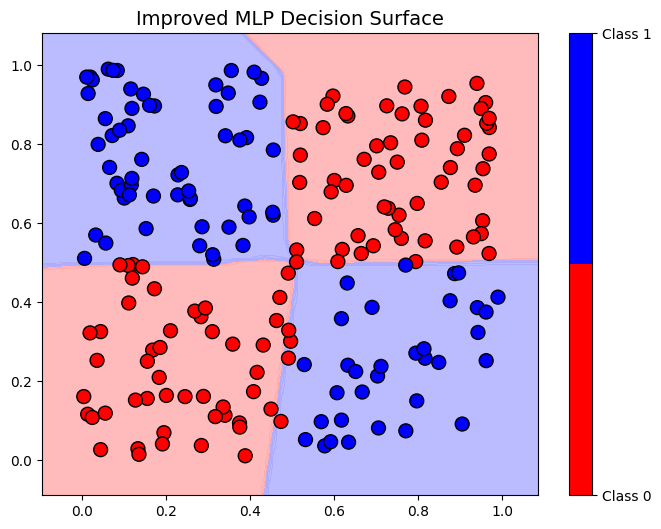

In [61]:
mlp_model = MLP()
optimizer_mlp = optim.Adam(mlp_model.parameters(), lr=0.01)
train_model(mlp_model, optimizer_mlp, X_train, y_train,num_epochs=4000)
fig, ax = plt.subplots(figsize=(8, 6)) 
plot_decision_surface(X_test.numpy(), y_test.numpy(), mlp_model, ax, "Improved MLP Decision Surface")
plt.show()

Epoch [100/4000], Loss: 0.2426
Epoch [200/4000], Loss: 0.1414
Epoch [300/4000], Loss: 0.1285
Epoch [400/4000], Loss: 0.1233
Epoch [500/4000], Loss: 0.1199
Epoch [600/4000], Loss: 0.1172
Epoch [700/4000], Loss: 0.1151
Epoch [800/4000], Loss: 0.1133
Epoch [900/4000], Loss: 0.1114
Epoch [1000/4000], Loss: 0.1092
Epoch [1100/4000], Loss: 0.1072
Epoch [1200/4000], Loss: 0.1050
Epoch [1300/4000], Loss: 0.1027
Epoch [1400/4000], Loss: 0.1005
Epoch [1500/4000], Loss: 0.0989
Epoch [1600/4000], Loss: 0.0969
Epoch [1700/4000], Loss: 0.0949
Epoch [1800/4000], Loss: 0.0933
Epoch [1900/4000], Loss: 0.0919
Epoch [2000/4000], Loss: 0.0904
Epoch [2100/4000], Loss: 0.0890
Epoch [2200/4000], Loss: 0.0877
Epoch [2300/4000], Loss: 0.0866
Epoch [2400/4000], Loss: 0.0854
Epoch [2500/4000], Loss: 0.0839
Epoch [2600/4000], Loss: 0.0825
Epoch [2700/4000], Loss: 0.0812
Epoch [2800/4000], Loss: 0.0806
Epoch [2900/4000], Loss: 0.0799
Epoch [3000/4000], Loss: 0.0787
Epoch [3100/4000], Loss: 0.0777
Epoch [3200/4000]

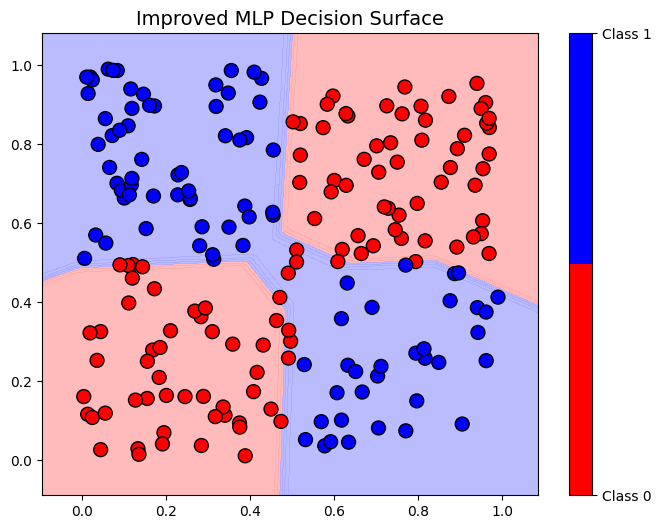

In [77]:
# MLP with L1 regularization
mlp_l1_model = MLP()
optimizer_l1 = optim.Adam(mlp_l1_model.parameters(), lr=0.01)
train_model(mlp_l1_model, optimizer_l1, X_train, y_train, l1_lambda=0.001,num_epochs=4000)
fig, ax = plt.subplots(figsize=(8, 6)) 
plot_decision_surface(X_test.numpy(), y_test.numpy(), mlp_l1_model, ax, "Improved MLP Decision Surface")
plt.show()

Epoch [100/4000], Loss: 0.3802
Epoch [200/4000], Loss: 0.1531
Epoch [300/4000], Loss: 0.1531
Epoch [400/4000], Loss: 0.1531
Epoch [500/4000], Loss: 0.1531
Epoch [600/4000], Loss: 0.1531
Epoch [700/4000], Loss: 0.1531
Epoch [800/4000], Loss: 0.1531
Epoch [900/4000], Loss: 0.1531
Epoch [1000/4000], Loss: 0.1531
Epoch [1100/4000], Loss: 0.1531
Epoch [1200/4000], Loss: 0.1531
Epoch [1300/4000], Loss: 0.1531
Epoch [1400/4000], Loss: 0.1531
Epoch [1500/4000], Loss: 0.1531
Epoch [1600/4000], Loss: 0.1531
Epoch [1700/4000], Loss: 0.1531
Epoch [1800/4000], Loss: 0.1532
Epoch [1900/4000], Loss: 0.1531
Epoch [2000/4000], Loss: 0.1532
Epoch [2100/4000], Loss: 0.1531
Epoch [2200/4000], Loss: 0.1532
Epoch [2300/4000], Loss: 0.1532
Epoch [2400/4000], Loss: 0.1532
Epoch [2500/4000], Loss: 0.1532
Epoch [2600/4000], Loss: 0.1531
Epoch [2700/4000], Loss: 0.1531
Epoch [2800/4000], Loss: 0.1532
Epoch [2900/4000], Loss: 0.1531
Epoch [3000/4000], Loss: 0.1531
Epoch [3100/4000], Loss: 0.1531
Epoch [3200/4000]

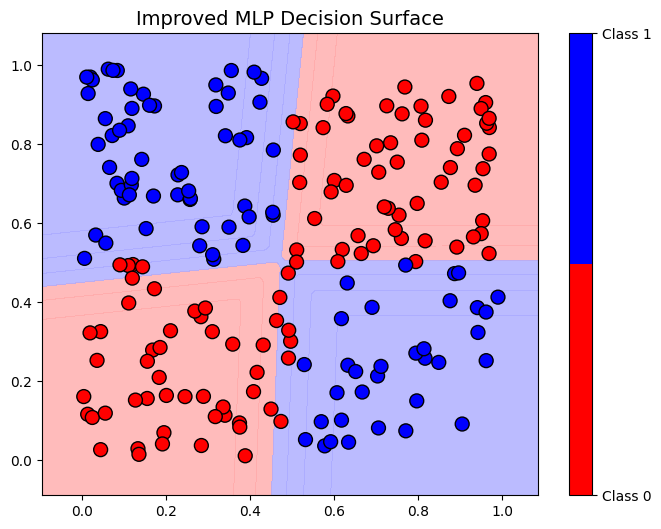

In [71]:
# MLP with L2 regularization (already done via weight decay in optimizer)w
mlp_l2_model = MLP()
optimizer_l2 = optim.Adam(mlp_l2_model.parameters(), lr=0.01, weight_decay=0.01,)
train_model(mlp_l2_model, optimizer_l2, X_train, y_train,num_epochs=4000)
fig, ax = plt.subplots(figsize=(8, 6)) 
plot_decision_surface(X_test.numpy(), y_test.numpy(), mlp_l2_model, ax, "Improved MLP Decision Surface")
plt.show()


Epoch [100/4000], Loss: 0.6696
Epoch [200/4000], Loss: 0.6456
Epoch [300/4000], Loss: 0.6219
Epoch [400/4000], Loss: 0.5992
Epoch [500/4000], Loss: 0.5779
Epoch [600/4000], Loss: 0.5580
Epoch [700/4000], Loss: 0.5394
Epoch [800/4000], Loss: 0.5220
Epoch [900/4000], Loss: 0.5058
Epoch [1000/4000], Loss: 0.4907
Epoch [1100/4000], Loss: 0.4765
Epoch [1200/4000], Loss: 0.4633
Epoch [1300/4000], Loss: 0.4509
Epoch [1400/4000], Loss: 0.4393
Epoch [1500/4000], Loss: 0.4284
Epoch [1600/4000], Loss: 0.4181
Epoch [1700/4000], Loss: 0.4084
Epoch [1800/4000], Loss: 0.3992
Epoch [1900/4000], Loss: 0.3905
Epoch [2000/4000], Loss: 0.3822
Epoch [2100/4000], Loss: 0.3744
Epoch [2200/4000], Loss: 0.3669
Epoch [2300/4000], Loss: 0.3597
Epoch [2400/4000], Loss: 0.3529
Epoch [2500/4000], Loss: 0.3464
Epoch [2600/4000], Loss: 0.3401
Epoch [2700/4000], Loss: 0.3341
Epoch [2800/4000], Loss: 0.3283
Epoch [2900/4000], Loss: 0.3228
Epoch [3000/4000], Loss: 0.3174
Epoch [3100/4000], Loss: 0.3123
Epoch [3200/4000]

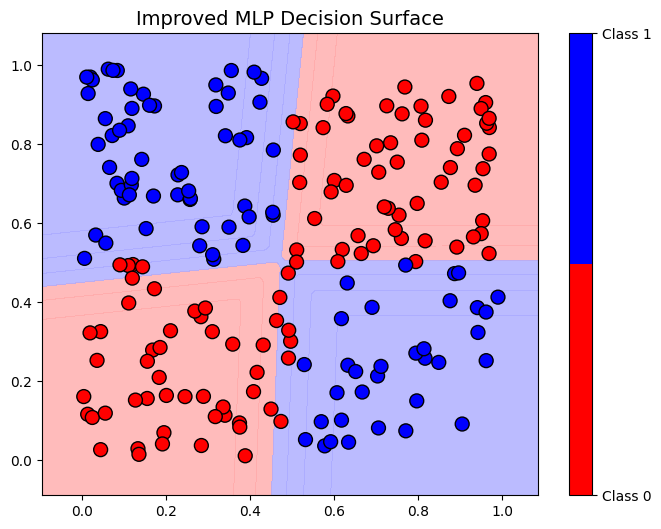

In [82]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_poly = torch.tensor(X_train_poly, dtype=torch.float32)
X_test_poly = torch.tensor(X_test_poly, dtype=torch.float32)

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.fc = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.fc(x))

logistic_model = LogisticRegressionModel(X_train_poly.shape[1])

optimizer_logistic = optim.Adam(logistic_model.parameters(), lr=0.01)
train_model(logistic_model, optimizer_logistic, X_train_poly, y_train,X_test=X_test_poly,num_epochs=4000)
fig, ax = plt.subplots(figsize=(8, 6)) 
plot_decision_surface(X_test.numpy(), y_test.numpy(), mlp_l2_model, ax, "Improved MLP Decision Surface")
plt.show()
